In [19]:
import pandas as pd 
import numpy as np
from pandas import DataFrame,Series

In [20]:
path_name="./titanic-data.csv"
titantic_data = pd.read_csv(path_name)
df_titantic=DataFrame(titantic_data)

# 1.准备工作

>## 1.1检查数据完整性

In [21]:
#检查数据完整性
df_titantic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


** 总共891行，cabin，age，cabin所在行的数据存在缺失，由于存在不完整数据，下一步将要清除值为NA的所在行，由于cabin缺失数据较多，所以直接删除cabin整列 **


In [22]:
df_titantic=df_titantic.drop(['Cabin'],axis=1)    #删除Cabin整列
df_titantic=df_titantic.dropna(axis=0)          #删除空值整行数据
df_titantic.info()                              #检查是否存在遗漏

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


**筛选后数据量为712行，由于删除大量数据，可能会造成分析结果不准确**

# 2.分析各项数据

>## 2.1构建需要用到的函数

>>### 2.1.1构建生还者人数堆柱形图

In [23]:
#构建绘制生还者人数的堆柱形图
% pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
def survial_count(key):
    df_titantic.groupby([key,'Survived'])['Survived'].count().unstack().plot(kind='bar',stacked=True)
    plt.ylabel('Count')
    plt.title('Number of Survived Passenger Number by {}'.format(key))

Populating the interactive namespace from numpy and matplotlib


>>### 2.1.2构建生存率函数

In [24]:
def survival_rate(key):
    df_titantic.groupby(key)['Survived'].mean().plot(kind='bar')
    plt.ylabel('Survival rate')
    plt.title('Survival rate by {}'.format(key))

>## 2.2 Pclass数据分析

>>### 2.2.1 Pclass生存人数分析

生还人数
1    120
2     83
3     85
Name: Pclass, dtype: int64
遇难人数
1     64
2     90
3    270
Name: Pclass, dtype: int64


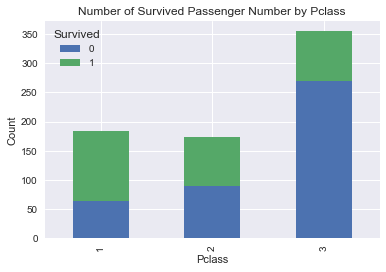

In [25]:
survial_count('Pclass')#构建生存人数图表
survived=df_titantic[df_titantic['Survived']==1]
unsurvived=df_titantic[df_titantic['Survived']==0]
print "生还人数"
print survived['Pclass'].value_counts(sort=False)
print "遇难人数"
print unsurvived['Pclass'].value_counts(sort=False)

>>### 2.2.2 与Pclass相关生存率分析

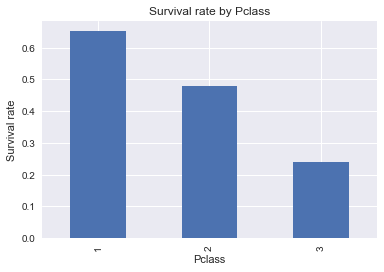

In [26]:
survival_rate('Pclass')#构建生存率图表

>>### 2.2.3结论

** 结论：**
1. **由生存人数图表得出结论：在一等舱人数大量少于三等舱人数，基本和二等舱人数相等的情况下，一等舱存活的人数（120人）远远大于二等舱（83人）和三等舱存活人数（85人），并且遇难人数小于二等舱与三等舱。**
2. **由生存率图表得出结论：一等舱生存率远远高于二等舱和三等舱**

* **由此得出结论，忽略其他影响因素，一等舱存活几率最高，二等舱次之，三等舱存活率最低**

>## 2.3性别数据分析

>>### 2.3.1 按性别分类，生存人数分析

生还人数
female    195
male       93
Name: Sex, dtype: int64
遇难人数
female     64
male      360
Name: Sex, dtype: int64


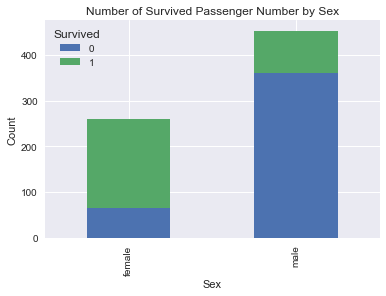

In [27]:
survial_count('Sex')
print "生还人数"
print survived['Sex'].value_counts(sort=False)
print "遇难人数"
print unsurvived['Sex'].value_counts(sort=False)

>>### 2.3.2 按性别分类，生存率分析

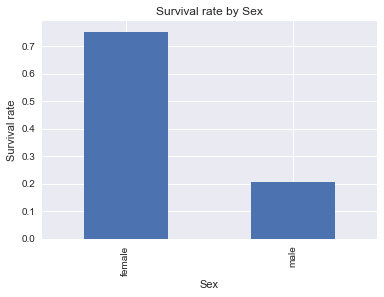

In [28]:
survival_rate('Sex')#构建生存率图表

>>## 2.3.3 结论

**结论**
1. **在女性总人数远远少于男性总人数的情况下，女性的生还人数(195人)仍旧远远大于男性生还人数（93人）**
2. **女性生存率远远大于男性生存率。**

* **由此得出结论，忽略其他影响因素，女性生存率高于男性生存率**

>## 2.4 年龄数据分析

>>### 2.4.1 按年龄分类，存活人数分析

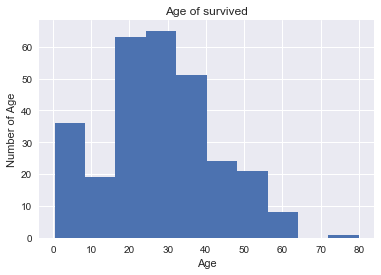

count    288.000000
mean      28.193299
std       14.859146
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [29]:
#绘制年龄生还人数的直方图
plt.xlabel('Age')
plt.ylabel('Number of Age')
plt.title('Age of survived')
plt.hist(survived['Age'], bins=10)
plt.show()
sns.set(color_codes=True)
survived['Age'].describe()

>>### 2.4.2按年龄分类，遇难人数分析

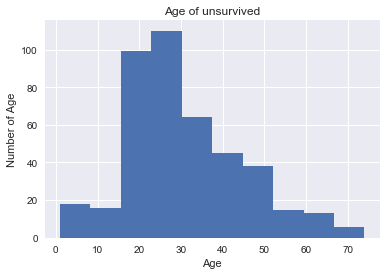

count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64

In [30]:
#绘制遇难人数按年龄分类的直方图
plt.xlabel('Age')
plt.ylabel('Number of Age')
plt.title('Age of unsurvived')
plt.hist(unsurvived['Age'], bins=10)
plt.show()
unsurvived['Age'].describe()

>>### 2.4.3 按年龄分类，总体乘船人数分析

整体Age相关数据


count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

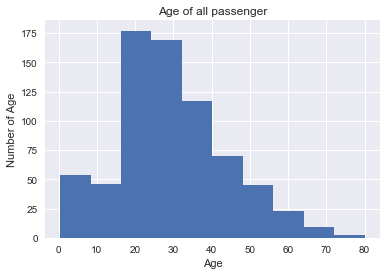

In [31]:
print '整体Age相关数据'
plt.xlabel('Age')
plt.ylabel('Number of Age')
plt.title('Age of all passenger')
plt.hist(df_titantic['Age'], bins=10)
df_titantic['Age'].describe()

**结论:**
1. **生存人数和遇难人数在两组直方图中大小关系基本相同无法判断哪个年龄段生存几率较高**
2. **根据总体age直方图年龄分布，年龄分布人数不均衡会造成数据分析不准确**
3. **由于age分布方差较大，故无法得出age与生存率的关系**

> ## 2.5 探究年龄层在1等仓的分布

In [32]:
#获取各舱位年龄分布
df_p_age= df_titantic.groupby('Pclass')['Age']
df_p_age.describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,184.0,38.105543,14.778904,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


(array([  3.,   6.,  30.,  29.,  41.,  27.,  27.,  15.,   5.,   1.]),
 array([  0.92 ,   8.828,  16.736,  24.644,  32.552,  40.46 ,  48.368,
         56.276,  64.184,  72.092,  80.   ]),
 <a list of 10 Patch objects>)

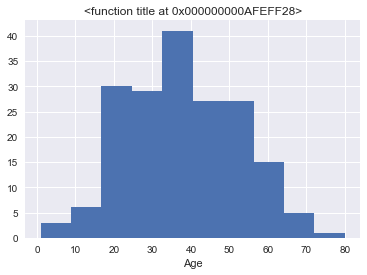

In [33]:
#获取1舱位年龄分布直方图
df_p1=df_titantic[df_titantic['Pclass']==1]
df_p1_age=df_p1['Age']
plt.xlabel('Age')
plt.ylabel('')
plt.title(title)
plt.hist(df_p1_age, bins=10)

**结论：**
* **由之前得出结论1舱位生存率较高，结合1舱位年龄分布图表可得出结论，35-40岁这一的年龄段的生存率高于其他年龄段生存率**

# 3 整体总结

1. **仓位对于生存率的影响：在1等仓人数少于其他级别仓位人数时，仍有较高的生还率和较低的遇难率，由此断定仓位对生存率存在影响。即1等仓的乘客生存率比较高。**
2. **性别对于生存率的影响 ：女性乘客人数少于男性乘客人数，但是其生存人数比男性乘客高，遇难人数比男性乘客低，由此断定女性乘客生存率较高。**
3. **年龄对于生存率的影响：由于各年龄段方差比较大，无法判断年龄与生存率的直接关系，但是通过分析1等舱年龄段人数，能够推测出35—40岁这一年龄段生存率高于其他年龄段生存率。**
4. **由于生存率是由多个条件共同作用，无法排除其余条件而单独分析某一项因素，同时由于一些数据缺以及不精确（比如年龄存在估算、船票是否代表本人所在仓位,  过滤空值数据而删掉大量数据等）而导致分析结果不够准确，该项目结论只是暂时性的。**